
# Making Numerical data Categorical #

Categorical variables can come from numeric variables by aggregating values.

For example:-
The test marks could be placed into broad categories of 0-40, 40-60 and over 60. To do this using R one uses the cut() function and the table() function

In [14]:
marks= c(23, 45, 65, 21,59, 70, 56, 80,43,22)
marks

[1] 23 45 65 21 59 70 56 80 43 22

In [15]:
cat = cut(marks, breaks = c(0, 40, 60, max(marks)))
cat

[1] (0,40]  (40,60] (60,80] (0,40]  (40,60] (60,80] (40,60] (60,80] (40,60]
[10] (0,40] 
Levels: (0,40] (40,60] (60,80]

In [16]:
levels(cat)

[1] "(0,40]"  "(40,60]" "(60,80]"

In [17]:
table(cat)

cat
 (0,40] (40,60] (60,80] 
      3       4       3 

# Bivariate Data #

Suppose a student survey is done to evaluate if students who smoke study less.

- Amount of studying :- "less than one hour"- "1", "5-10 year" - "2", "more than 10 years" - "3"


In [18]:
smokes = c("Y","N","N","Y","N","Y","Y","Y","N","Y")
amount = c(1,2,2,3,3,1,2,1,3,2)
table(smokes,amount)

      amount
smokes 1 2 3
     N 0 2 2
     Y 3 2 1

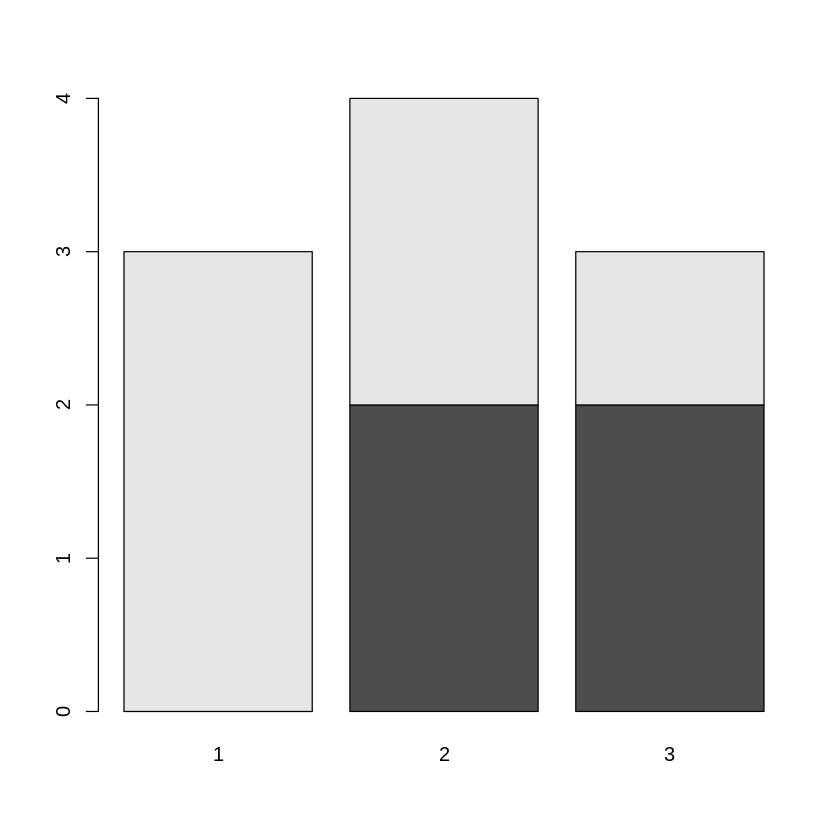

In [19]:
barplot(table(smokes,amount))

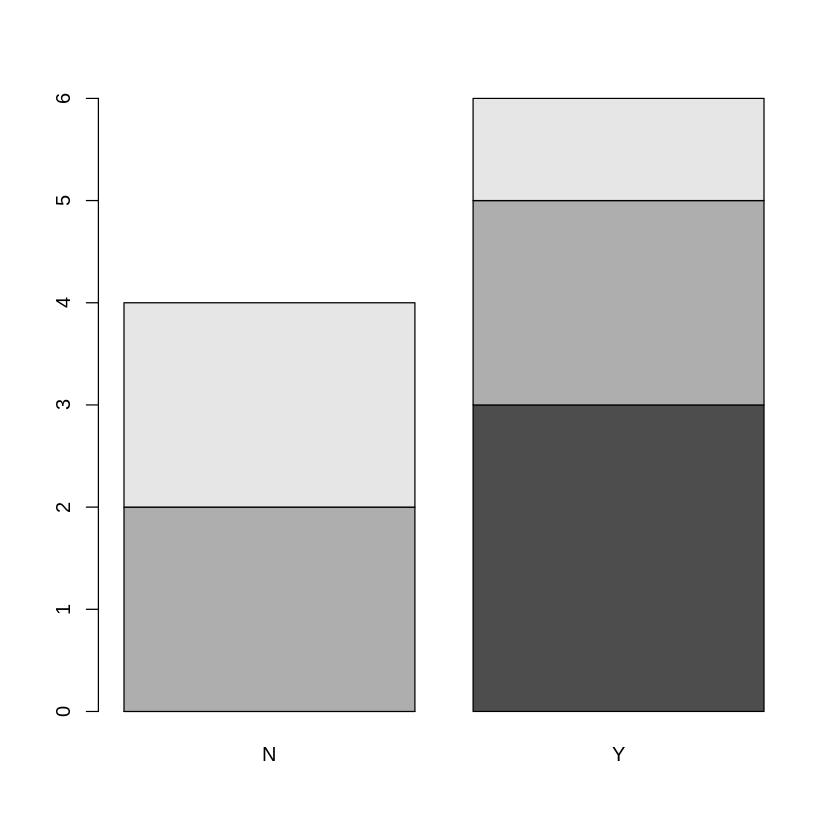

In [20]:
barplot(table(amount,smokes))

In [ ]:
install.packages("vcd")
install.packages(c("vcd","grid"))

In [ ]:
library(vcd)
library(grid)

In [21]:
 data("Arthritis")
head(Arthritis)

,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked


We can generate simple frequency counts using the table() function.

Here’s an example:


In [22]:
mytable <- with(Arthritis, table(Improved))
 mytable

Improved
  None   Some Marked 
    42     14     28 

We can turn these frequencies into proportions with prop.table()


In [23]:
prop.table(mytable)

Improved
     None      Some    Marked 
0.5000000 0.1666667 0.3333333 

In [24]:
#or into percentages, using prop.table()*100
prop.table(mytable)*100

Improved
    None     Some   Marked 
50.00000 16.66667 33.33333 

For two-way tables, the format for the table() function is

In [26]:
# Treatment will be row and Improved will be column
mytable <- xtabs(~ Treatment+Improved, data=Arthritis)
mytable

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

We can generate marginal frequencies and proportions using the margin.table()

In [27]:
 margin.table(mytable, 1) # 1 represents row here

Treatment
Placebo Treated 
     43      41 

In [28]:
 margin.table(mytable, 2) # 2 represent the column

Improved
  None   Some Marked 
    42     14     28 

We can use the addmargins() function to directly add marginal sums to our contingency tables.

In [29]:
addmargins(mytable)

,None,Some,Marked,Sum
Placebo,29,7,7,43
Treated,13,7,21,41
Sum,42,14,28,84


# **Chi Square Test** #

Chi-square test is used to check the association between two variables.
_________

### **Test #1**

 Here, we are taking two variables, Treatment and Improved.

` H0: Treatment and Improved are independent.`

` H1: Treatment and Improved are not independent.`

In [30]:
# First, creating a contingency table for these two variables
mytable <- xtabs(~ Treatment+Improved, data=Arthritis)
mytable

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

In [31]:
chisq.test(mytable)


	Pearson's Chi-squared test

data:  mytable
X-squared = 13.055, df = 2, p-value = 0.001463


Here, we can see, it is a Pearson's Chi-Squared test where we got:
- X-squared: which is a Chi-Squared value
- The degree of freedom (in this case 2)
- p-value

As we can see that the p-value < 0.05, we can reject the null hypothesis and accept the alternate hypothesis.

**`Therefore, we conclude that there is association between the two variables i.e., Treatment and Improvement.`**

## **Test #2**

 Here, we are taking two variables, Sex and Improvement to check if there is some association between the two.

 ` H0: Sex and Improved are independent.`

` H1: Sex and Improved are not independent.`

In [32]:
# First, creating a contingency table for these two variables
mytable2 = xtabs(~Improved + Sex, data = Arthritis)
mytable2

        Sex
Improved Female Male
  None       25   17
  Some       12    2
  Marked     22    6

In [33]:
chisq.test(mytable2)

Warning message in chisq.test(mytable2):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  mytable2
X-squared = 4.8407, df = 2, p-value = 0.08889


As we can see that the p-value > 0.05, we fail to reject the null hypothesis and reject the alternate hypothesis.

**`Therefore, we conclude that there is no association between the two variables i.e., Sex and Improved. They are independent from one another.`**

----------

### **Important**

Here, we can also see the warning message: “Chi-squared approximation may be incorrect”

As we know, the basic assumptions/conditions for Chi-Squared test are:


1.   The sample observation should ne independent.
2.   No, theoritical cell frequency should be less than 5.

In [34]:
mytable2

        Sex
Improved Female Male
  None       25   17
  Some       12    2
  Marked     22    6

Here, we can see that out contingency table contains a cell with frequency 2 which violates the second assumption.

-------

Therefore, in this case we cahange our from `Chi-Squared test` to `Fisher's Exact Test`.

## **Fisher's Exact Test**

## **Test #3**

 Here, we are taking two variables, Sex and Improvement to check if there is some association between the two.

 ` H0: Sex and Improved are independent.`

`H1: Sex and Improved are not independent.`

In [35]:
mytable2

        Sex
Improved Female Male
  None       25   17
  Some       12    2
  Marked     22    6

In [36]:
fisher.test(mytable2)


	Fisher's Exact Test for Count Data

data:  mytable2
p-value = 0.1094
alternative hypothesis: two.sided


Again, we can see that the p-value > 0.05, we accept the null hypothesis and reject the alternate hypothesis.

**`Therefore, we conclude that there is no association between the two variables i.e., Sex and Improved. They are independent from one another.`**